
# Análise dos Dados do Airbnb - New York City

<center><img alt="New York" width="80%" src="https://mapadomundo.org/wp-content/uploads/2016/09/Times-Square_Fotor.jpg"></center>


O [Airbnb](https://www.airbnb.com.br/) é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

O [Airbnb](https://www.airbnb.com.br/) já **hospedou mais de 1 bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova York e veremos quais insights podemos extrair a partir dos dados brutos.**

# Obtenção dos Dados e Pacotes Utilizados


In [6]:
# Pacotes Utilizados

!pip install cartopy
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import folium as folium
from folium.plugins import HeatMap
import seaborn as sns
import numpy as np



In [8]:
# Data Base Utilizado para o DataFrame - Arquivo listings.csv - New York City

df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/visualisations/listings.csv")


<ipython-input-8-44dd9dd7c6f7>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/visualisations/listings.csv")


##As 5 primeiras e 5 útimas entradas do dataset

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN


In [10]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.847271,-73.943419,Private room,80,5,0,NaN,NaN,3,358,0,NaN
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.638329,-74.016710,Entire home/apt,42,30,0,NaN,NaN,3,89,0,NaN
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Allison,Manhattan,Murray Hill,40.746902,-73.978260,Entire home/apt,3888,2,0,NaN,NaN,8,365,0,NaN
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Natasha,Manhattan,Murray Hill,40.749596,-73.980798,Entire home/apt,3888,2,0,NaN,NaN,2,364,0,NaN
41532,771975190766692224,Lovely Big Studio for Rental Bronx City,426540801,Abul,Bronx,Unionport,40.832824,-73.852371,Entire home/apt,80,3,0,NaN,NaN,2,365,0,NaN


In [11]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

##**Dicionário das variáveis**

* id - Identificador exclusivo do Airbnb para o anúncio
* name - Descrição da propriedade
* host_id - Identificador exclusivo do Airbnb para o anfitrião/usuário
* host_name - Nome do anfitrião. Apenas o primeiro nome
* neighbourhood_group - Grupo de bairros
      ** Os bairros de Nova York são agrupados em regiões maiores. 
       Ex: Os bairros de Midtown e Hudson Yards integram o grupo Manhattan
* neighbourhood - Nome do Bairro
* latitude - Latitude do Imóvel
* longitude - Longitude do Imóvel
* room_type - Tipo de quarto
* price - Preço US$
* minimum_nights - Noites minímas exigidas para reserva
* number_of_reviews - Número de avaliações que a propriedade possui
* last_review - Data da última avaliação
* reviews_per_month - Avaliações por mês
* calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião na mesma região geográfica
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - Número de Avalições nos últimos 12 meses
* license - Esta coluna não contém nenhum valor válido


# **1. Atributos (variáveis) e quantidade de entradas o conjunto de dados possui**

#### Identificando o volume de dados do DataFrame

In [12]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 41533
Variáveis:	 18



#### Identificando os tipos das variáveis

In [13]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

# **2. Porcentagem de valores ausentes no *dataset***


In [14]:
# Em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.999976
reviews_per_month                 0.226158
last_review                       0.226158
name                              0.000313
host_name                         0.000120
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [15]:
df.isnull().sum().sort_values(ascending=False)

license                           41532
reviews_per_month                  9393
last_review                        9393
name                                 13
host_name                             5
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Podemos veriricar que:

 * As variavéis "name" e "host_name" 
 * a variável "license" esta com 100% dos seus dados nulos.
 * as variáveis "reviews_per_month" e "last_review" estão com  23% de seus valores nulos.

Essas variáveis não afetaram nossa análise, pois focaremos em preço, ocupação, tipo de propriedades, noites minímas exigidas e região.
Desta forma faremos a exclusão dessas variáveis.

In [16]:
df_clean = df.copy()

In [17]:
df_clean.drop('license', axis=1, inplace=True)

In [18]:
df_clean.drop('reviews_per_month', axis=1, inplace=True)
df_clean.drop('last_review', axis=1, inplace=True)

Para a variável "name", que possui apenas 13 entradas nulas, foi realizado uma pesquisa no arquivo para tentar localizar o nome dessas propriedades com base na variável "host_name", porem não foi possivel.

Como se trata de uma variavél que não irá afetar a nossa análise realizaremos o preenchimento dela com o valor contido na variável "host_name" da mesma linha.

In [19]:
df_clean.loc[df_clean.name.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1827,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73192,-73.98819,Entire home/apt,700,60,28,1,359,0
2831,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73323,-73.99294,Entire home/apt,225,30,1,1,0,0
2982,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72100,-73.99536,Entire home/apt,215,30,5,1,0,0
3099,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,30,0,1,0,0
3296,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85111,-73.93009,Private room,40,30,0,1,0,0
4395,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,30,0,1,0,0
5916,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76617,-73.98435,Entire home/apt,190,30,1,1,0,0
6343,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80551,-73.95069,Entire home/apt,300,30,0,5,0,0
6675,10116081,NaN,51913270,Andrew,Manhattan,Midtown,40.75939,-73.96949,Entire home/apt,200,30,0,1,0,0
6711,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,80,30,3,1,0,0


In [20]:
df_clean.loc[df_clean.host_name.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2972,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67605,-73.95997,Private room,50,30,0,1,0,0
3270,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72119,-73.95279,Entire home/apt,195,30,1,1,0,0
4038,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.69977,-73.92912,Private room,37,30,1,1,0,0
4512,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71944,-73.95645,Entire home/apt,145,30,0,1,0,0
4928,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82992,-73.94033,Private room,28,30,1,1,0,0


In [21]:
name_fill =  df_clean.host_name
df_clean = df_clean.fillna({"name": name_fill})

host_fill = df_clean.name
df_clean = df_clean.fillna({"host_name": host_fill})


Após essas correções o dataset ficou da seguinte forma:

In [22]:
df_clean.isnull().sum() / df_clean.shape[0]


id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

In [23]:

print("Entradas_Old:\t {}".format(df.shape[0]))
print("Variáveis_Old:\t {}\n".format(df.shape[1]))
print("Entradas_New:\t {}".format(df_clean.shape[0]))
print("Variáveis_New:\t {}\n".format(df_clean.shape[1]))

Entradas_Old:	 41533
Variáveis_Old:	 18

Entradas_New:	 41533
Variáveis_New:	 15



# **3. Distribuição das variáveis** 

Agora faremos um exame de como está a distribuição das variáveis. 
Para isso iremos plotar um histograma geral e analisar quadro a quadro.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

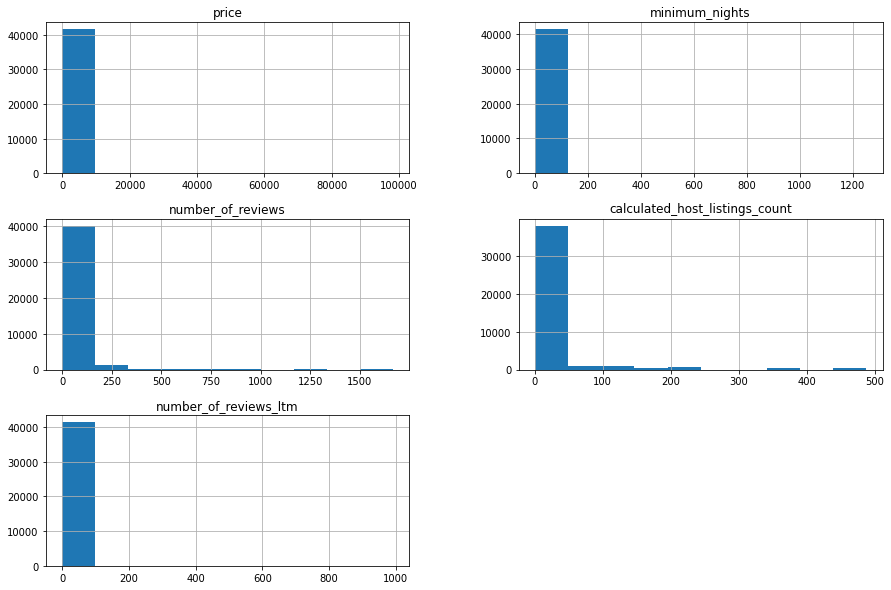

In [24]:
# plotar o histograma das variáveis numéricas
df_clean.hist(['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'number_of_reviews_ltm'], bins=10, figsize=(15,10))

Com base nos histogramas plotados podemos ver que existe uma grande disperção dos dados. Tendo isso em vista, iremos analisar caso a caso para identificar e tratar os ***outliers***

#4.Tratando os ***OUTLIERS***

Para a identificação de ***outliers*** utilizamos a a distribuição em histograma, o que torna possível a identificação destes. Podemos ver nas variáveis 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' e 'number_of_reviews_ltm, que elas não seguem uma distribuição dentro do histograma e distorcem a representação gráfica, o que indica a presença de ***OUTLIERS***.

Para confirmar, iremos utilizar duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar boxplots para a variável.

In [25]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,number_of_reviews_ltm
count,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000
mean,221.978282,18.592204,26.204994,20.626803,7.983700
std,919.502236,30.699921,56.178847,68.874393,18.563894
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,80.000000,2.000000,1.000000,1.000000,0.000000
50%,131.000000,10.000000,5.000000,1.000000,1.000000
75%,220.000000,30.000000,25.000000,4.000000,8.000000
max,98159.000000,1250.000000,1666.000000,487.000000,992.000000


De acordo com o resumo estatístico verificamos as seguintes situações:

* Na variável 'price' temos 75% dos valores menores que 220.00 e o valor máximo é de 98159.00 por noite.
* Na variável 'minimum_nigths' temos 75% dos valores abaixo de 30 dias e o maior está como 1250.00, o que é bem acima de 365 dias no ano.
* NA variável 'number_of_reviews' temos 75% dos valores abaixo de 25 e seu valor máximo é de 1666.00.
* Na variável 'calculated_host_listings_count' 75% é menor do que 4 e seu valor máximo é 487.
* Na variável 'number_of_reviews_ltm tem 75% dos valores abaixo de 8 e seu valor máximo está em 992.00.

Esses dados desmonstram a presença de ***outliers*** pois o valor máximo deles está absurdamente acima do que 75% das entradas.
Para confirmarmos isso iremo plotar um boxplot para mais uma analise e confirmação dos ***outliers***

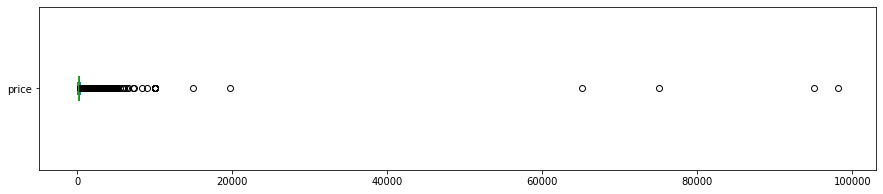

price: valores acima de 3000:
136 entradas
0.3275%


In [26]:
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
print("price: valores acima de 3000:")
print("{} entradas".format(len(df_clean[df_clean.price > 3000])))
print("{:.4f}%".format((len(df_clean[df_clean.price > 3000]) / df.shape[0])*100))

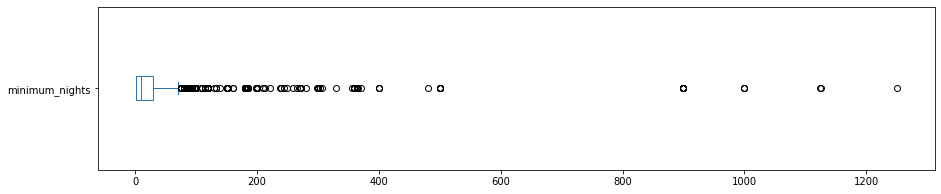

minimum_nights: valores acima de 30:
1930 entradas
4.6469%


In [27]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights > 30])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights > 30]) / df.shape[0])*100))

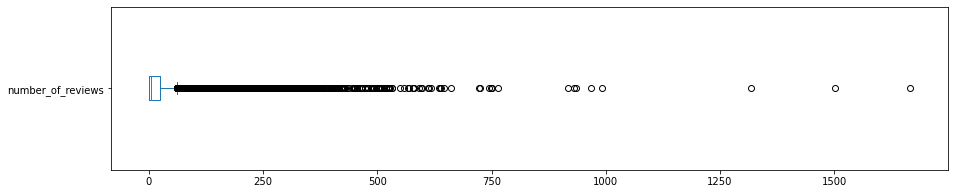

number_of_reiews: valores acima de 300:
275 entradas
0.6621%


In [28]:
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("number_of_reiews: valores acima de 300:")
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews > 300])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews > 300]) / df.shape[0])*100))


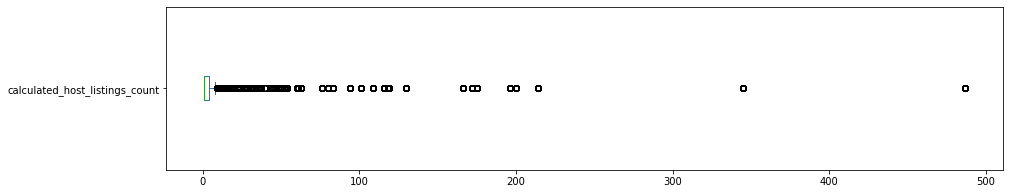

calculated_host_listings_count: valores acima de 200:
1046 entradas
2.5185%
Proprietários com mais de 200 imóveis:['Blueground' 'Eugene' 'June']


In [29]:
df_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("calculated_host_listings_count: valores acima de 200:")
print("{} entradas".format(len(df_clean[df_clean.calculated_host_listings_count > 200])))
print("{:.4f}%".format((len(df_clean[df_clean.calculated_host_listings_count > 200]) / df.shape[0])*100))
print("Proprietários com mais de 200 imóveis:{}".format(df_clean[df_clean.calculated_host_listings_count > 200].host_name.unique()))

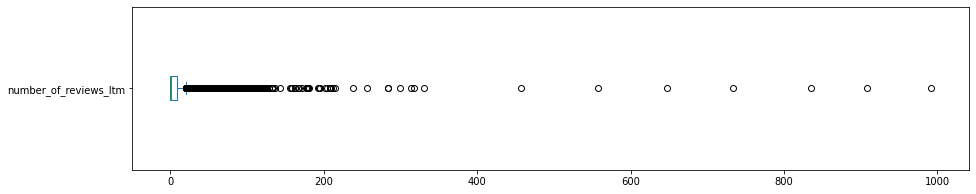

number_of_reiews_ltm: valores acima de 365:
7 entradas
0.0169%


In [30]:
df_clean.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("number_of_reiews_ltm: valores acima de 365:")
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews_ltm > 365])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews_ltm > 365]) / df.shape[0])*100))

Os ***outliers*** identificados acima serão retirados do dataset para termos uma visão melhor no histograma sem prejudicar a qualidade dos dados. Desta forma, faremos as exluções com os seguintes parâmetros:

* Na variável 'price' assumiremos US$ 3,000.00 como um valor máximo para uma diária.
* Na variável 'minimum_nights' consideraremos 30 dias como máximo de diárias minimas.
* Na variável 'number_of_reviews' assumiremos 300 como número máximo, pois levando em consideração que apenas 275 imoveis contem avaliações acima de 300.
* Na variável 'calculated_host_listings_count' faremos a exclução utilizando o limitador de 200 imoveis, pois somente 3 proprietários tem uma quantidade maior do que 200 imoveis disponiveis para hospedagem.
* Na variável 'number_of_reviews_ltm' consideraremos o numero de 365, pois isso corresponde a uma avalicão por dia dos ultimos 12 meses.

Para fazer a remoção dos dados conforme setup acima, usaremos os seguintes comandos:

In [31]:
df_clean.drop(df_clean[df_clean.price > 3000]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price < 1]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 300]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 200]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 365]. index, axis=0, inplace=True)

Após essa remoção verificaremos novamente através da visualização do histograma como os dados estão dispostos.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

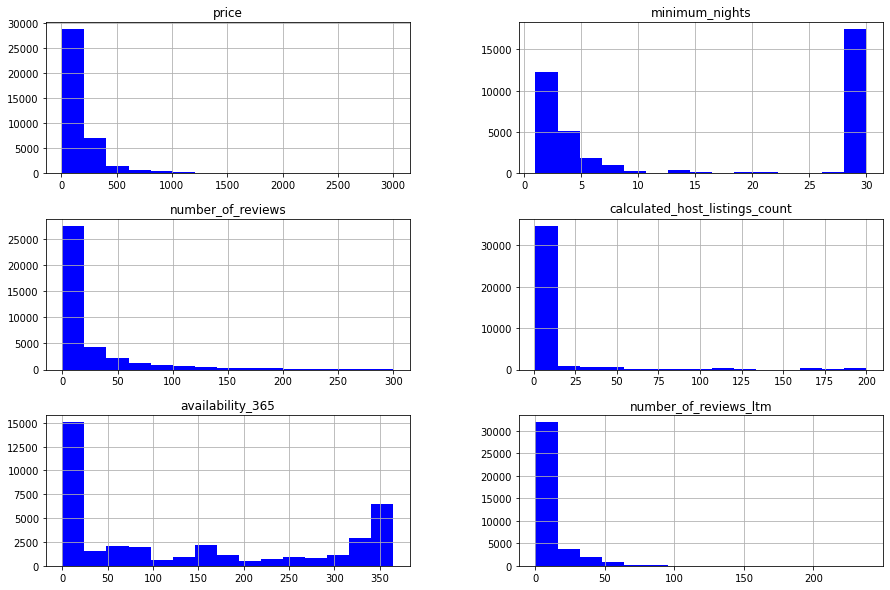

In [32]:
df_clean.hist(['price','minimum_nights', 'number_of_reviews', 
       'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'], bins=15, figsize=(15, 10), color='blue')

# **5. Analisando os valores das hospedagens**

Nesta seção realizaremos algumas análises em cima dos valores das hospedagens da cidade de Nova York. Para isso, utilizaremos as seguintes variáveis 'neighbourhood', 'neighbourhood_group', 'room_type', 'price', 'latidute', 'longitude', 

Começaremos buscando a média geral dos preços para New York e em seguida iremos setorizando esses valores.
Para localizar o preço médio iremos utilizar a função `describe()`.

*Valor da Médio de uma Diária: US$ 199.41



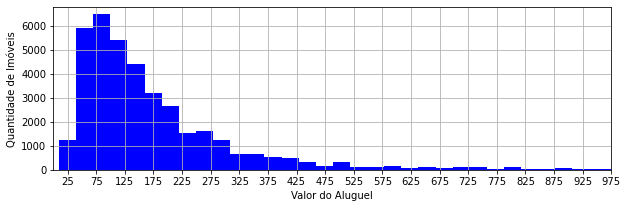

In [33]:
df_clean.price.describe()
Média = df_clean.price.mean()
print(f"*Valor da Médio de uma Diária: US${Média: .2f}")
print()
df_clean.price.hist(bins=100, figsize=(10, 3), color='blue')
plt.ylabel('Quantidade de Imóveis')
plt.xlabel('Valor do Aluguel')
plt.xlim(0, 10)
plt.xticks(range(25, 1000, 50))
plt.show()


Com base nos dados apresentados acima podemos verificar que o preço médio para a cidade de Nova York é de 199,00 dolares. 

O histograma da variável 'price' também mostra que há uma grande quantidade de imóveis na faixa de 50 a 125 dolares. Deste modo, faremos uma análise por região para verificar quais são as areas mais baratas e mais caras NYC.


### **5.1.Valores por localidade**



Iremos verificar a média de preços por região, utilizando duas variáveis para isso, a primeira será 'neighbourhood', para identificarmos o bairro mais caro e o mais barato e a segunda é 'neighbourhood_group', ou seja, os grupos de bairros que já estão inseridos no dataset para identificarmos quais zonas da cidade são as mais caras em média.

In [34]:
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
Fort Wadsworth      650.000000
Theater District    616.445205
Tribeca             541.504065
SoHo                535.237736
Hollis Hills        484.000000
                       ...    
West Farms           74.333333
Country Club         70.000000
Grant City           65.750000
Bull's Head          60.000000
New Dorp             40.000000
Name: price, Length: 223, dtype: float64

Como podemos ver com a funcão chamada, dos 223 bairros listados no dataset o bairro mais caro da cidade de Nova York é o ***Fort Wadsworth*** com uma média de 650,00 dolares, porem devemos consultar a quantidade de imoveis existente nessa localidade para confirmar se está informação é correspondente de um conjunto de imoveis ou de um unico imovel.
Para isso iremos localizar todos os imoveis que constam dentro deste bairro com a funcão `loc`

In [35]:
df_clean.loc[df_clean['neighbourhood'] == 'Fort Wadsworth'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11457,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,650,30,0,2,365,0


Como podemos ver neste bairro existe apenas um imovel e assim interferindo diretamente no ranking de valor médio.
Iremos filtrar os bairros que têm menos de 50 entradas para garantir que os resultados sejam estatisticamente significativos e então faremos um novo ranking e agruparemos os bairros usando a função `groupby`, para obter os valores mediano, médio, Maximo, Minimo e a quantidade de hospedagem para cada bairro.



In [190]:
counts = df_clean['neighbourhood'].value_counts(normalize=True, ascending=False)
result = df_clean.groupby('neighbourhood').filter(lambda x: len(x) >= 50).groupby('neighbourhood')['price'].agg(['median', 'mean', 'max', 'min', 'size'])
result = result.join(counts.rename('percentage'))
result.columns = ['Valor Mediano', 'Valor Médio', 'Maior Valor', 'Menor Valor','Qts de Hospedagens', '% de Hospedagens em relação ao total']
result.sort_values(by='Valor Médio', ascending=False)


,Valor Mediano,Valor Médio,Maior Valor,Menor Valor,Qts de Hospedagens,% de Hospedagens em relação ao total
neighbourhood,,,,,,
Theater District,457.5,616.445205,2999,44,292,0.007500
Tribeca,364.0,541.504065,2714,42,123,0.003159
SoHo,270.0,535.237736,3000,46,265,0.006806
Midtown,282.0,439.221224,2886,44,1781,0.045743
Financial District,342.5,414.260784,2922,35,510,0.013099
...,...,...,...,...,...,...
Elmhurst,61.0,91.460432,2000,20,278,0.007140
Fordham,66.0,90.014085,350,34,71,0.001824
Inwood,79.0,88.657754,350,32,187,0.004803


Como podemos ver o ranking mudou significativamente e agora podemos dizer que os bairros mais caros da cidade de Nova York são ***Theater District, Tribeca, SoHo, Midtown, Financial District*** e os mais baratos são ***Elmhurst, Fordham, Inwood, Jackson Heights e Woodside***

Agora veremos também a qual região da cidade esses bairros pertencem e criaremos um ranking por região.


In [165]:
# Bairros mais caros
caros = df_clean.loc[df_clean['neighbourhood'].isin(['Theater District', 'Tribeca', 'SoHo', 'Midtown', 'Financial District']), 'neighbourhood_group'].iloc[0]
print("Bairros mais caros pertencem a", caros)

# Bairros mais baratos
baratos = df_clean.loc[df_clean['neighbourhood'].isin(['Elmhurst', 'Fordham', 'Inwood', 'Jackson Heights', 'Woodside']), 'neighbourhood_group'].iloc[0]
print("Bairros mais baratos pertencem a", baratos)


Bairros mais caros pertencem a Manhattan
Bairros mais baratos pertencem a Queens


In [157]:
counts = df_clean['neighbourhood_group'].value_counts(normalize=True, ascending=False)
result = df_clean.groupby('neighbourhood_group').filter(lambda x: len(x) >= 50).groupby('neighbourhood_group')['price'].agg(['median', 'mean', 'max', 'min', 'size'])
result = result.join(counts.rename('percentage'))
result.columns = ['Valor Mediano', 'Valor Médio', 'Maior Valor', 'Menor Valor', 'Qts de Hospedagens', '% de Hospedagens em relação ao total']
result.sort_values(by='Valor Médio', ascending=False)

,Valor Mediano,Valor Médio,Maior Valor,Menor Valor,Qts de Hospedagens,% de Hospedagens em relação ao total
neighbourhood_group,,,,,,
Manhattan,175.0,275.038904,3000,10,15911,0.408655
Brooklyn,120.0,159.710494,3000,10,14808,0.380326
Staten Island,100.0,141.111675,1929,30,394,0.010119
Queens,94.0,125.817572,2257,10,6260,0.160781
Bronx,89.0,115.087708,2000,10,1562,0.040118


Com os dados acima confirmamos que os bairros mais caros e baratos são os mencionados pois os grupos a que eles pertencem seguem o mesmo padrão.
Outra informação que podemos retirar desta analise é que os dois agrupamentos de bairros mais caros são também os que têm a maior quantidade de hospedagens disponiveis juntos somama quase 80% de todas as hospedagens de Nova York.

Para termos uma noção mais visual desses dados vamos plotar um `HeatMap` com base nos valores médios dos alugeis

In [147]:
#coordenadas do centro do mapa
lat, lon = 40.7128, -74.0060

# O mapa com base nas coordenadas do centro
ny_map = folium.Map(location=[lat, lon], zoom_start=11)

# obter as coordenadas e preços médios dos bairros
result = df_clean.groupby('neighbourhood')[['latitude', 'longitude', 'price']].mean().reset_index()

# plotar o heatmap com base nas coordenadas e preços médios dos bairros
HeatMap(data=result[['latitude', 'longitude', 'price']], 
        name='heatmap', 
        min_opacity=0.4, 
        radius=15, 
        blur=6, 
        max_zoom=15, 
        gradient={0.8: 'blue', 0.4: 'purple', 0.8: 'orange', 1: 'red'}).add_to(ny_map)

In [148]:
# exibir o mapa
ny_map


#**6. Verificação se  há alguma correlação existente entre as variáveis**

Correlação nos dirá se existe relação entre duas variáveis.

Esta relação pode ser medida, e é a função do coeficiente de correlação estabelecer qual a intensidade dela. Quanto mais o coeficiente de correlação se aproximar de 1.0, maior é a correlação entre elas.

Para identificar as correlações existentes entre as variáveis iremos utilizar um `heatmap`.

In [167]:

# criando uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrando a matriz de correlação

display(corr)



,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.180979,-0.047496,0.100767,0.135208
minimum_nights,-0.180979,1.000000,-0.245033,0.085947,-0.261938
number_of_reviews,-0.047496,-0.245033,1.000000,-0.090145,0.101764
calculated_host_listings_count,0.100767,0.085947,-0.090145,1.000000,0.099830
availability_365,0.135208,-0.261938,0.101764,0.099830,1.000000


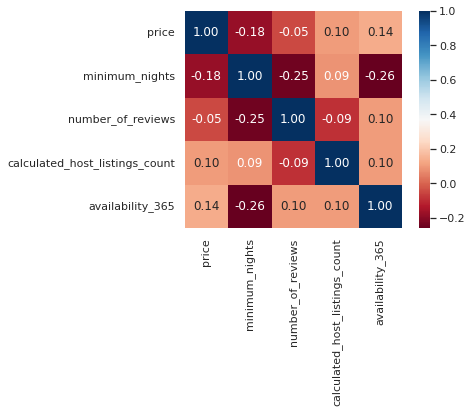

In [173]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# **7. Tipo de hospedagem mais alugada no Airbnb**

Navariável **room_type** temos o tipo de hospedagem que está disponibilizado no Airbnb.

Dentro do nosso dataset temos opções de apartamentos ou casas inteiras, aluguel de um quarto e quarto compartilhado.

Primeiramente vamos analisar os tipos de hospedagens a serem alugados com seus valores únicos, depois contar e verificar a quantitade de ocorrências de cada tipo de aluguel.

In [174]:
df_clean.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [188]:
# Quantidade de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts())
print()
# Percentual de cada tipo de imóvel disponível
print((df_clean.room_type.value_counts() / df_clean.shape[0] * 100).apply(lambda x: f'{x:.2f}%'))


Entire home/apt    22030
Private room       16261
Shared room          497
Hotel room           147
Name: room_type, dtype: int64

Entire home/apt    56.58%
Private room       41.76%
Shared room         1.28%
Hotel room          0.38%
Name: room_type, dtype: object


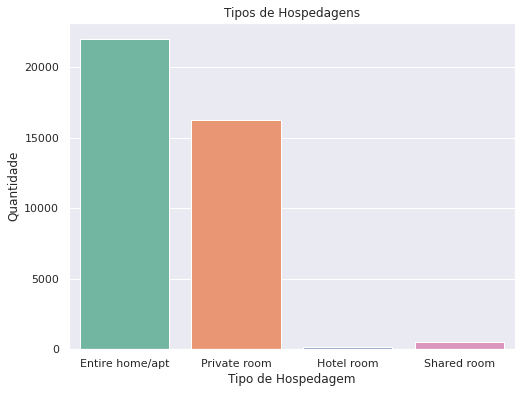

In [178]:
# Criando um gráfico de barras
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(x='room_type', data=df_clean, palette='Set2')

# Definindo o título e o label dos eixos
plt.title('Tipos de Hospedagens')
plt.xlabel('Tipo de Hospedagem')
plt.ylabel('Quantidade')

# Mostrando o gráfico
plt.show()


Com base nos dados acima, temos 4 tipos de aluguéis e suas respectivas disponibilidades:

Entire home/apt - 22.030 unidades - 56.58% dos aluguéis
Private room - 16.261 unidades - 41,76% dos aluguéis
Shared room - 497 - 1,28% dos aluguéis
Hotel room - 77 - 0,38% dos aluguéis
Podemos concluir que o imóvel mais alugado é do tipo home/apt.

# **8. Verificando o mínimo de noites para aluguel (minimum_nights) e taxa de ocupação.**

Para verificarmos a taxa de ocupação das hospedagens iremos utilizar a variável 'neighburhood_goup' para que os dados fiquem mais consitentes em ves de pegarmos bairro a bairro.


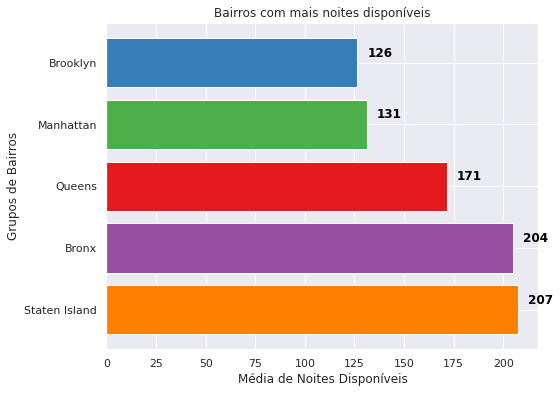

In [210]:
# agrupando por bairro e calculando a média de noites disponiveis
ratings = df_clean.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=True)[:10]

# criando um gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(y=ratings.index, width=ratings.values, color=['#377eb8', '#4daf4a', '#e41a1c', '#984ea3', '#ff7f00'])

# adicionando o valor numérico de cada barra
for i, v in enumerate(ratings.values):
    ax.text(v + 5, i - 0.1, str(int(v)), color='black', fontweight='bold')

# ajustando o tamanho e o espaçamento das barras
plt.subplots_adjust(left=0.3)
ax.invert_yaxis()

# definindo os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Média de Noites Disponíveis')
ax.set_ylabel('Grupos de Bairros')
ax.set_title('Bairros com mais noites disponíveis')

# exibindo o gráfico
plt.show()



Como podemos ver no gráfico acima os imóveis localizados no Brooklyn e em Manhattan ficam disponivéis um pouco mais de 125 noites. Agora se pegarmos os numeros de Staten Island, os imóveis passam mais de 200 dias por ano disponiveis para locação.
Isso decorre devido a localização desses imoveis Bronx e Staten Island são regiões mais afastadas do centro e de população mais humilde e quanto Brooklyn e Manhattan são o caração da cidade e assim são os locais mais procurados por turistas e pessoa a negócios.

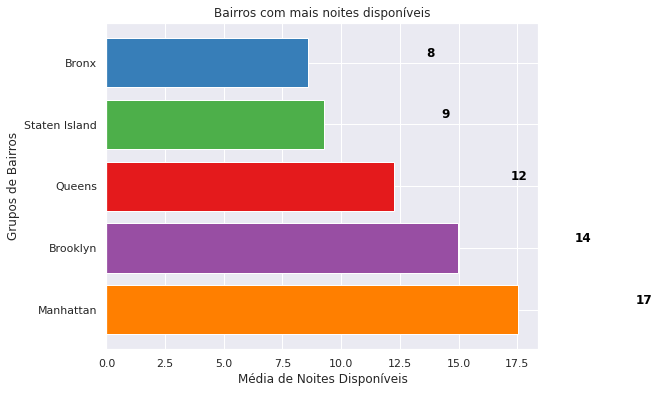

In [212]:
# agrupando por bairro e calculando a média de noites disponiveis
ratings = df_clean.groupby('neighbourhood_group')['minimum_nights'].mean().sort_values(ascending=True)[:10]

# criando um gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(y=ratings.index, width=ratings.values, color=['#377eb8', '#4daf4a', '#e41a1c', '#984ea3', '#ff7f00'])

# adicionando o valor numérico de cada barra
for i, v in enumerate(ratings.values):
    ax.text(v + 5, i - 0.1, str(int(v)), color='black', fontweight='bold')

# ajustando o tamanho e o espaçamento das barras
plt.subplots_adjust(left=0.3)
ax.invert_yaxis()

# definindo os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Média de Noites Mínimas Exigidas')
ax.set_ylabel('Grupos de Bairros')
ax.set_title('Bairros Maior Exigencia de Noites Mínimas')

# exibindo o gráfico
plt.show()

Seguindo o no sentido das informações sobre disponibilidade o gráfico acima nos mostra que os imóveis localizados no Brooklyn e em Manhattan são os que tem maoir numero de noites mínimas exigidas ficando entre 14 e 17 noites enquanto no Bronx e Staten Island, os imóveis exgigem bem menos noites ficando entre 8 e 9 noites.
Isso decorre devido as altas taxas de ocupação que localização desses imóveis tem no Brooklyn e Manhattan se exige um numero maior de noites minimas, já no Bronx e Staten Island, ocorre exatamente ao contrario, que são regiões com uma taxa menor de ocupapação se exige um numero menor de noites mínimas.

#Conclusões


Com base na análise dos dados do Airbnb em Nova York, foi possível identificar a presença de valores ausentes em algumas variáveis, mas que não afetam diretamente a análise realizada, pois o foco foi preço, ocupação, tipo de propriedades, noites mínimas exigidas e região. Além disso, foi possível identificar a presença de alguns outliers em algumas variáveis, como preço, noites mínimas exigidas, número de avaliações e quantidade de imóveis disponíveis para hospedagem. Esses outliers foram tratados no dataset para termos uma visão melhor sem prejudicar a qualidade dos dados.

Ao analisar os valores das hospedagens, foi possível verificar que o preço médio de hospedagem no ano de 2022 para a cidade de Nova York foi de 199,00 dólares, mas também há uma grande quantidade de imóveis na faixa de 50 a 125 dólares. 
A partir da análise setorizada das variáveis 'neighbourhood', 'neighbourhood_group', 'room_type', 'price', 'latitude' e 'longitude', foi possível identificar que as regiões mais caras e com maior taxa de ocupação são Manhattan e Brooklyn, enquanto que Bronxs, Queens e Staten Island são mais acessíveis e tem uma taxa menor de ocupação. Além disso, foi possível verificar que a maioria das propriedades são apartamentos privados e quartos privados, seguidos de apartamentos compartilhados e quartos compartilhados.